In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import sys

from pathlib import Path

path = str(Path.cwd().parent)
sys.path.append(path)

In [2]:
import numpy as np

from constant import DATASET, SETTINGS
from copy import deepcopy
from datatype.dataset import Dataset
from datatype.settings import Settings
from datatype.signal import Signal
from datatype.spectrogram import Linear, Mel, Spectrogram
from io import BytesIO
from IPython.display import Audio, display
from PIL import Image, ImageOps

In [3]:
def create_spectrogram(signal, settings):
    spectrogram = Spectrogram()
    strategy = Linear(signal, settings)
    spectrogram.strategy = strategy

    return spectrogram.generate()

In [4]:
individual = 'DbWY_STE2017'
filename = 'STE02_DbWY2017'

recording = DATASET.joinpath(individual, 'recordings', filename + '.wav')
settings = SETTINGS.joinpath('spectrogram.json')

settings = Settings.from_file(settings)

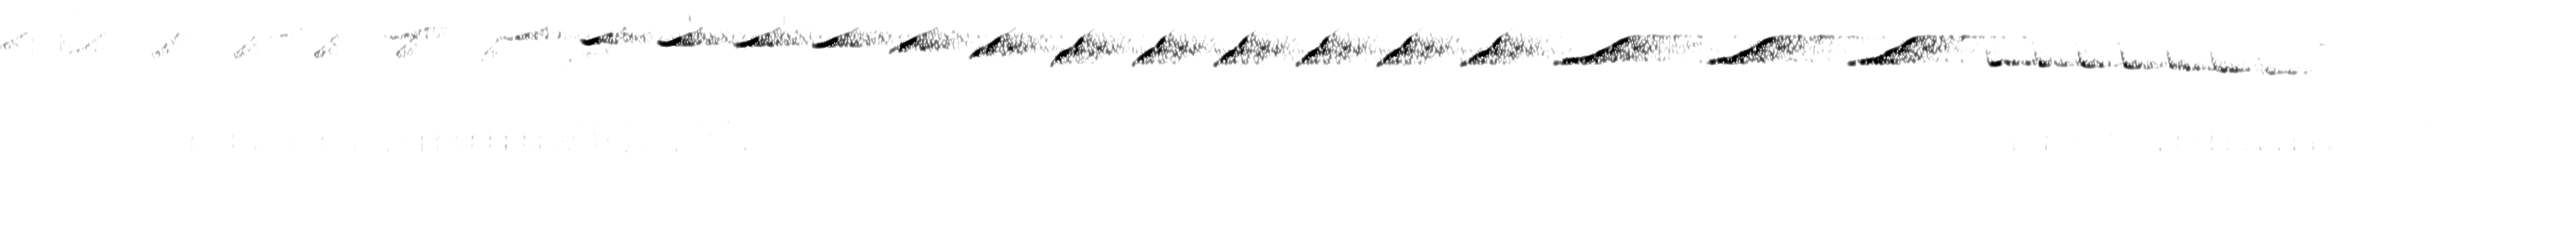

In [5]:
signal = deepcopy(
    Signal(recording)
)

signal.normalize()

spectrogram = np.frompyfunc(
    lambda x, y: create_spectrogram(x, y),
    2,
    1
)(signal, settings)

image = Image.fromarray(~spectrogram)
display(image)

audio = Audio(
    data=signal.data,
    rate=signal.rate,
    autoplay=False
)

display(audio)